In [2]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import folium

# Train Dataset

In [3]:
train = pd.read_excel("Metro-Train-Station-Patronage-from-2005-06-to-2018-2019-1 (2).xlsx", 
                      sheet_name = "Station Data by Financial Year", skiprows = 1)
train = train[pd.notnull(train["Line Group"])]

train_new = train[['Line Group', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12','2013-14', '2014-15', '2015-16', '2016-17',
       '2017-18', '2018-19']]
train_new = train_new.pivot_table(index = 'Line Group', aggfunc = 'mean').reset_index()
train_new

,Line Group,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2013-14,2014-15,2015-16,2016-17,2017-18,2018-19
0,Burnley,5.607955e+05,6.092749e+05,6.726787e+05,6.774742e+05,6.863359e+05,7.184132e+05,6.647764e+05,6.619746e+05,6.504433e+05,6.746935e+05,6.699303e+05,6.992089e+05,7.136466e+05
1,Caulfield,5.863584e+05,6.479665e+05,7.307311e+05,7.946369e+05,8.143737e+05,8.438021e+05,8.103724e+05,7.626611e+05,7.720219e+05,8.262231e+05,8.234862e+05,8.017933e+05,7.774072e+05
2,Clifton Hill,3.486157e+05,3.756417e+05,4.168180e+05,4.556364e+05,4.694197e+05,4.879718e+05,4.624430e+05,4.633305e+05,4.658661e+05,5.108850e+05,5.148463e+05,4.992637e+05,5.306114e+05
3,Inner City / City Loop,6.576066e+06,7.213223e+06,8.128627e+06,9.069119e+06,9.239636e+06,9.846304e+06,9.848876e+06,1.065934e+07,1.055312e+07,1.046631e+07,1.067942e+07,1.095460e+07,1.102417e+07
4,Northern,4.425861e+05,4.899290e+05,5.589385e+05,6.148934e+05,6.404861e+05,6.502420e+05,6.306263e+05,6.191428e+05,6.636615e+05,6.913133e+05,7.072570e+05,7.282941e+05,7.468690e+05
5,Special,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.688049e+05,1.757981e+05,1.961949e+05
6,Stony Point,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.111973e+04,1.044320e+04,1.089206e+04


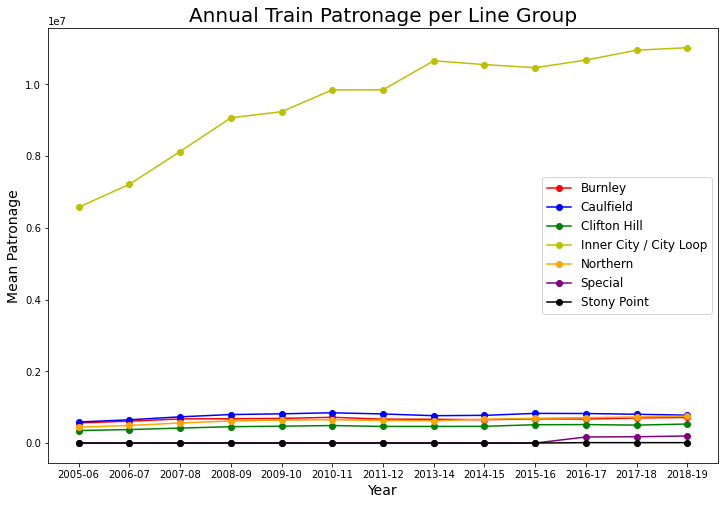

In [4]:
c = ['r', 'b', 'g', 'y', 'orange', 'purple', 'black']
plt.rcParams['figure.figsize'] = [12,8]
for i in range(7):
    plt.plot(train_new.columns[1:], train_new.iloc[i, 1:], marker = 'o', color = c[i], label = train_new['Line Group'][i])

plt.title('Annual Train Patronage per Line Group', fontsize = 20)

plt.ylabel('Mean Patronage', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.legend(fontsize = 12, loc = 'best')
plt.show()

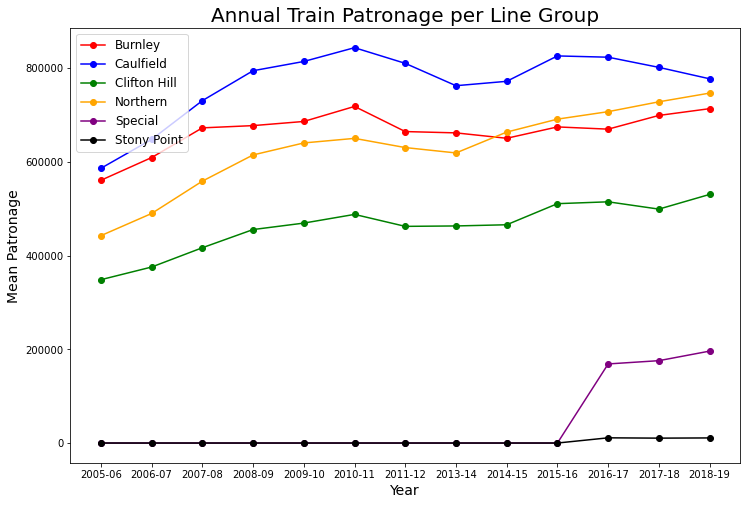

In [5]:
c = ['r', 'b', 'g', 'y', 'orange', 'purple', 'black']
plt.rcParams['figure.figsize'] = [12,8]
for i in [0,1,2,4,5,6]:
    plt.plot(train_new.columns[1:], train_new.iloc[i, 1:], marker = 'o', color = c[i], label = train_new['Line Group'][i])

plt.title('Annual Train Patronage per Line Group', fontsize = 20)

plt.ylabel('Mean Patronage', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.legend(fontsize = 12, loc = 'best')
plt.show()

# Metro Station coordinates

In [6]:
# metro 좌표있는 데이터 읽기
metro_point = pd.read_csv("metro_stations_accessibility.csv")
metro_point['the_geom'] = metro_point['the_geom'].apply(lambda x : re.sub("[^0-9\\. -]","", x))
metro_point['the_geom'].apply(lambda x : x.split())
metro_point['lat'] = metro_point['the_geom'].apply(lambda x : x.split()[1])
metro_point['lon'] = metro_point['the_geom'].apply(lambda x : x.split()[0])

metro_final = metro_point[['station', 'lat', 'lon']]
train_fare_geom = pd.merge(train, metro_final, left_on = 'Station', right_on = 'station')

train_fare_geom_1 = train_fare_geom[['Station', '2018-19', 'lat', 'lon']]
train_fare_geom_1

,Station,2018-19,lat,lon
0,Aircraft,303173.928475,-37.866603,144.760809
1,Alamein,145683.983658,-37.86884299999997,145.07955800000002
2,Albion,686116.710176,-37.77765599999998,144.82470999999998
3,Alphington,296923.090050,-37.77839599999999,145.031251
4,Altona,302853.557510,-37.86724899999996,144.830604
...,...,...,...,...
213,Williamstown Beach,202931.482612,-37.86408399999999,144.894682
214,Willison,102617.872638,-37.835487,145.07014000000004
215,Windsor,915797.468836,-37.85582899999997,144.99173300000007
216,Yarraman,302072.411436,-37.97814699999998,145.19175200000006


In [7]:
HR_map = folium.Map(location=[train_fare_geom_1['lat'][0],train_fare_geom_1['lon'][0]], zoom_start = 12)

for n in train_fare_geom_1.index:
    folium.CircleMarker(
        [train_fare_geom_1['lat'][n], train_fare_geom_1['lon'][n]],
        radius = train_fare_geom_1['2018-19'][n] / 500000,
        color = 'black',
        fill_color = 'black',
        tooltip = round(train_fare_geom_1['2018-19'][n],2)
    
    ).add_to(HR_map)
HR_map.save("train_station_black.html")
HR_map

# Postcodes coordinates

In [9]:
lat = pd.read_csv("australian_postcodes.csv")
lat_vic = lat[lat['state'] == 'VIC']
lat_vic = lat_vic[['SA2_NAME_2016', 'SA3_NAME_2016', 'lat', 'long']]
lat_vic_final = lat_vic.reset_index().drop(columns = ['index'])
lat_vic_final = lat_vic_final.pivot_table(index = 'SA3_NAME_2016', aggfunc = 'mean').reset_index()
lat_vic_final

,SA3_NAME_2016,lat,long
0,Ballarat,-37.565648,143.803859
1,Banyule,-37.733338,145.079263
2,Barwon - West,-38.056173,144.077258
3,Baw Baw,-38.017980,146.064602
4,Bayside,-37.944648,145.014178
...,...,...,...
67,Whittlesea - Wallan,-37.518165,145.047207
68,Wodonga - Alpine,-36.367316,147.306941
69,Wyndham,-37.887711,144.669547
70,Yarra,-37.810106,144.992272


In [10]:
lat_vic_final_a_l = pd.read_csv('lat_vic_final_a_l.csv')
lat_vic_final_a_l

,SA3_NAME_2016,change
0,Ballarat,Ballarat
1,Banyule,Banyule
2,Barwon - West,X
3,Baw Baw,Baw Baw
4,Bayside,Bayside
...,...,...
67,Whittlesea - Wallan,Whittlesea
68,Wodonga - Alpine,Alpine
69,Wyndham,Wyndham
70,Yarra,Yarra


In [11]:
def check_name(data):
    try:
        result = lat_vic_final_a_l[lat_vic_final_a_l['SA3_NAME_2016'] == data].iloc[0,1]
    except:
        result = []
    if len(result) == 0:
        return data
    else:
        return result

In [12]:
lat_vic_final['SA3_NAME_2016'] = lat_vic_final['SA3_NAME_2016'].apply(lambda x: check_name(x))
lat_vic_final = lat_vic_final[lat_vic_final['SA3_NAME_2016'] != 'X'].reset_index(drop=True)
lat_vic_final = lat_vic_final.pivot_table(index = 'SA3_NAME_2016', aggfunc = 'mean').reset_index()
lat_vic_final

,SA3_NAME_2016,lat,long
0,Alpine,-36.367316,147.306941
1,Ballarat,-37.565648,143.803859
2,Banyule,-37.733338,145.079263
3,Baw Baw,-38.017980,146.064602
4,Bayside,-37.944648,145.014178
5,Boroondara,-36.520168,140.061306
6,Brimbank,-37.763720,144.784522
7,Campaspe,-36.360998,144.746046
8,Cardinia,-38.087205,145.544397
9,Casey,-38.065597,145.290806


# Census

In [13]:
census = pd.read_excel("Census.xls", sheet_name = 'Table 2', skiprows = 8)

census.rename(columns={'Unnamed: 0' : 'LGA_code',
                       'Unnamed: 1' : 'Local_Government_Area',
                       'Unnamed: 2' : 'ERP_June_2019',
                       'Unnamed: 3' : 'ERP_June_2020',
                       'Unnamed: 5' : 'ERP_chage',
                       'Unnamed: 6' : 'ERP_chage_percent',
                       'Unnamed: 8' : 'Area_km2',
                       'Unnamed: 9' : 'population_density'},inplace = True)
census = census[['LGA_code','Local_Government_Area',
                 'ERP_June_2019','ERP_June_2020','ERP_chage',
                 'ERP_chage_percent','Area_km2','population_density']]

census['Local_Government_Area'] = census['Local_Government_Area'].apply(lambda x : re.sub("\\({1}.+","",str(x)).strip())
census['Local_Government_Area'] = census['Local_Government_Area'].apply(lambda x : re.sub('Northern Grampians', "Grampians", x))
census['Local_Government_Area'] = census['Local_Government_Area'].apply(lambda x : re.sub('Southern Grampians', "Grampians", x))

census_final = census[['Local_Government_Area', 'ERP_June_2019']]
census_final = census_final.iloc[:79,:]
census_final = census_final.pivot_table(index = 'Local_Government_Area', aggfunc = 'mean').reset_index()
census_lat_lon = pd.merge(lat_vic_final, census_final, left_on = 'SA3_NAME_2016', right_on = 'Local_Government_Area')
census_lat_lon

,SA3_NAME_2016,lat,long,Local_Government_Area,ERP_June_2019
0,Alpine,-36.367316,147.306941,Alpine,12812.0
1,Ballarat,-37.565648,143.803859,Ballarat,109504.0
2,Banyule,-37.733338,145.079263,Banyule,131640.0
3,Baw Baw,-38.017980,146.064602,Baw Baw,53394.0
4,Bayside,-37.944648,145.014178,Bayside,106856.0
5,Boroondara,-36.520168,140.061306,Boroondara,183197.0
6,Brimbank,-37.763720,144.784522,Brimbank,209568.0
7,Campaspe,-36.360998,144.746046,Campaspe,37615.0
8,Cardinia,-38.087205,145.544397,Cardinia,112179.0
9,Casey,-38.065597,145.290806,Casey,353962.0


# Building Dataset

In [15]:
building= pd.read_csv("Buildings_with_name__age__size__accessibility__and_bicycle_facilities.csv")
building_2019 = building[building['Census year'] == 2019]
building_2019 = building_2019[['Census year','Street address', 'CLUE small area', 'Predominant space use', 'Accessibility type', 
                               'x coordinate', 'y coordinate', 'Location']] 
building_2019 = building_2019.rename(columns = {"x coordinate" :  'lon', 'y coordinate': 'lat'})
building_2019['cnt'] = 1
building_2019 = building_2019.reset_index().drop('index', axis = 1)

def change(x):

    if x in ['Office', 'Storage', 'Educational/Research', 'Manufacturing', 'Hospital/Clinic','Workshop/Studio']:
        return ('Office')

building_2019['Predominant space use'] = building_2019['Predominant space use'].apply(lambda x : change(x))
value = list(building_2019.columns[5:8])
building_2019_csa = pd.pivot_table(building_2019, index = ['CLUE small area'], values = value, aggfunc = 'mean').reset_index()
building_2019_cnt = building_2019.groupby(['CLUE small area', 'Predominant space use']).agg({'cnt': sum}).reset_index()
building_2019_merge = pd.merge(building_2019_csa, building_2019_cnt, how = 'outer', on = 'CLUE small area')

building_2019_merge_office = building_2019_merge[building_2019_merge['Predominant space use'] == 'Office'].reset_index().drop(columns = {'index'})
building_2019_merge_office

,CLUE small area,lat,lon,Predominant space use,cnt
0,Carlton,-37.798933,144.968864,Office,229
1,Docklands,-37.819877,144.941180,Office,42
2,East Melbourne,-37.813799,144.985553,Office,112
3,Kensington,-37.793556,144.926398,Office,133
4,Melbourne (CBD),-37.813110,144.963576,Office,495
5,Melbourne (Remainder),-37.834356,144.978521,Office,26
6,North Melbourne,-37.799387,144.947369,Office,302
7,Parkville,-37.789024,144.951225,Office,72
8,Port Melbourne,-37.826073,144.915623,Office,125
9,South Yarra,-37.835535,144.982950,Office,12


In [16]:
HR_map = folium.Map(location=[building_2019_merge_office['lat'][0],building_2019_merge_office['lon'][0]], zoom_start = 12)
for n in building_2019_merge_office.index:
    folium.CircleMarker(
        [building_2019_merge_office['lat'][n], building_2019_merge_office['lon'][n]],
        radius = building_2019_merge_office['cnt'][n] / 10,
        color = 'red',
        fill_color = 'red',
        tooltip = round(building_2019_merge_office['cnt'][n],2)
    
    ).add_to(HR_map)

HR_map

# Solution: Express Train Line

In [17]:
HR_map = folium.Map(location=[train_fare_geom_1['lat'][0],train_fare_geom_1['lon'][0]], zoom_start = 12)

for n in train_fare_geom_1.index:
    folium.CircleMarker(
        [train_fare_geom_1['lat'][n], train_fare_geom_1['lon'][n]],
        radius = train_fare_geom_1['2018-19'][n] / 500000,
        color = 'black',
        fill_color = 'black',
        tooltip = round(train_fare_geom_1['2018-19'][n],2)
    
    ).add_to(HR_map)

HR_map

In [19]:
# funciton to make express train line
def get_map_line(l, col):
    Station_line_df = pd.DataFrame({"Station" : l})
    line_lat_lon = pd.merge(Station_line_df, train_fare_geom_1, on='Station')
    lat = line_lat_lon['lat'].apply(lambda x : float(x))
    lon = line_lat_lon['lon'].apply(lambda x : float(x))
    location_data = list(zip(lat, lon))
    
    for n in line_lat_lon.index:
        folium.CircleMarker(
            [line_lat_lon['lat'][n], line_lat_lon['lon'][n]],
            radius = 10,
            color = col,
            fill_color = col,
            fill=True).add_to(HR_map)

    folium.PolyLine(locations = location_data, color = col, tooltip = col + 'Line').add_to(HR_map)

In [20]:
HR_map = folium.Map(location=[train_fare_geom_1['lat'][0],train_fare_geom_1['lon'][0]], zoom_start = 12)

for n in train_fare_geom_1.index:
    folium.CircleMarker(
        [train_fare_geom_1['lat'][n], train_fare_geom_1['lon'][n]],
        radius = train_fare_geom_1['2018-19'][n] / 500000,
        color = 'black',
        fill_color = 'black',
        tooltip = round(train_fare_geom_1['2018-19'][n],2)
    
    ).add_to(HR_map)

get_map_line(l = ['Ringwood','Box Hill','Camberwell','Glenferrie','Richmond'],col = "red")
get_map_line(l = ['Sunshine','Footscray'],col = "blue")


l = ['Southern Cross','Flinders Street','Parliament', 'Melbourne Central', 'Flagstaff','Southern Cross']
Station_line_df = pd.DataFrame({"Station" : l})
col = "green"
line_lat_lon = pd.merge(Station_line_df, train_fare_geom_1, on='Station')
l1 = line_lat_lon.iloc[0:1,:]
l2 = line_lat_lon.iloc[1:,:]
line_lat_lon = pd.concat([l2, l1]).reset_index(drop = True)
lat = line_lat_lon['lat'].apply(lambda x : float(x))
lon = line_lat_lon['lon'].apply(lambda x : float(x))
location_data = list(zip(lat, lon))
    
for n in line_lat_lon.index:
    folium.CircleMarker(
    [line_lat_lon['lat'][n], line_lat_lon['lon'][n]],
    radius = 10,
    color = col,
    fill_color = col,
    fill=True).add_to(HR_map)

folium.PolyLine(locations = location_data, color = col, tooltip = col + 'Line').add_to(HR_map)


get_map_line(l = ['Dandenong','Springvale','Clayton','Huntingdale','Oakleigh', 'Caulfield','South Yarra'],col = "yellow")
get_map_line(l = ['Werribee','Hoppers Crossing','Williams Landing','Newport'],col = "purple")

HR_map.save("train_station1.html")
HR_map
